# Simple model

## States

$age_t \in \{57,110\}$: Age.

$d_{t-1} \in \{0,1\}$: Labor market status in beginning of period $t$. 0: retired, 1: working.

$a_{t-1} \in \mathcal{R}_{+}$: Wealth in beginning of period $t$.

## Choices

$C_t \in \mathcal{R}$: Consumption.

$d_t \in \{0,1\}$: Labor market status.

Retirement is absorbing.

## Model

$$V_t(\mathbf{s}_t, \varepsilon_t) = 
\max_{C_t, d_t} \lbrace U(C_t, d_t, \mathbf{s}_t) + \sigma_{\varepsilon} \varepsilon_t(d_t) + 
\beta \mathbf{E}_t \left[\pi_{t+1} V_{t+1}(\mathbf{s}_t, \varepsilon_{t+1}) + (1 - \pi_{t+1})B(a_t) \right]\rbrace$$

$$U(C_t, d_t) = \frac{C_t^{1 - \rho}}{1 - \rho} + \alpha(\mathbf{s}_t) \mathbf{1}_{\{d_t=0\}}$$

$$B(a_t) = \gamma a_t$$

$$\pi_t(age_t)$$

## Parameters

In [2]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=8)
%matplotlib inline
# reload module each time cell is run
%load_ext autoreload
%autoreload 2
from Model import RetirementModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# a. setup (calling the __init__ method) 
model = RetirementModelClass(name='baseline',solmethod='egm')

# b. print
print(model) #???

# c. solve
model.solve()

AttributeError: 'ParClass' object has no attribute 'W'

In [16]:
model.simulate()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

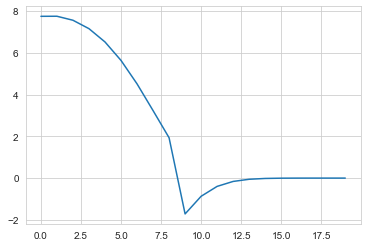

In [18]:
plt.plot(np.mean(model.sim.c, axis=1))

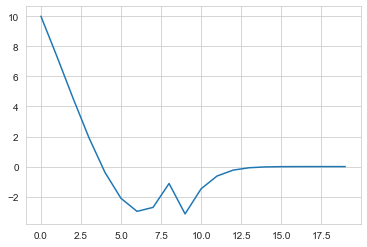

In [13]:
plt.plot(np.mean(model.sim.m, axis=1))

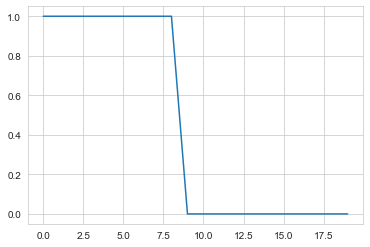

In [19]:
plt.plot(np.mean(model.sim.d, axis=1))

In [20]:
model.sim.d[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])